In [62]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

from keras.datasets import fashion_mnist

# Carregar Dataset fashion

In [3]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [4]:
type(X_train),type(y_train),type(X_test),type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [5]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
X_train.dtype,y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [7]:
y_train[0]

9

In [8]:
# X_train[0, :, :]

# Plotar um item

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [10]:
plt.rcParams['figure.figsize'] = 3,3


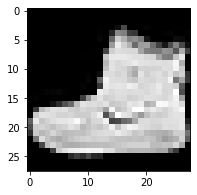

In [11]:
plt.imshow(X_train[0, :, :],cmap='gray')

In [12]:
X_train.min() ,X_train.max()

(0, 255)

In [13]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

In [15]:
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

## Normalizar e resolver compatibilidade entre python 2 e 3

In [19]:
X_train.astype('float32')
X_train = X_train /255

In [20]:
X_test.astype('float32')
X_test = X_test /255

In [21]:
from keras.utils import to_categorical

## Para o Keras precisa estar em dummy categorical a variavel de saida

In [22]:
y_train = to_categorical(y_train,10)

In [23]:
y_test = to_categorical(y_test,10)

In [32]:
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [33]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Treinar modelo

In [34]:
from keras.models import Sequential
from keras.layers import Dense

In [37]:
# units (neuronios camada escondida)
# input_dim (atributos previsores)
# activation='softmax'
model = Sequential()
# Primeira camada de neuronios
model.add(Dense(units=100,
                input_shape=(784,),
                activation='relu'))
# Segunda camada de neuronios
model.add(Dense(units=100,
               activation='relu'))
# Camada de saida units=10 pq tenho 10 classes
model.add(Dense(units=10,activation='softmax'))

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics =['accuracy'])
model.fit(X_train,
           y_train,
          epochs = 128,
          validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/128
60000/60000 [==============================] - 4s 70us/step - loss: 0.9226 - accuracy: 0.6612 - val_loss: 0.6492 - val_accuracy: 0.7621
Epoch 2/128
60000/60000 [==============================] - 4s 65us/step - loss: 0.5887 - accuracy: 0.7858 - val_loss: 0.5614 - val_accuracy: 0.7998
Epoch 3/128
60000/60000 [==============================] - 4s 68us/step - loss: 0.5241 - accuracy: 0.8124 - val_loss: 0.5281 - val_accuracy: 0.8149
Epoch 4/128
60000/60000 [==============================] - 4s 74us/step - loss: 0.4821 - accuracy: 0.8275 - val_loss: 0.4979 - val_accuracy: 0.8199
Epoch 5/128
60000/60000 [==============================] - 4s 68us/step - loss: 0.4539 - accuracy: 0.8392 - val_loss: 0.4824 - val_accuracy: 0.8261
Epoch 6/128
60000/60000 [==============================] - 4s 69us/step - loss: 0.4342 - accuracy: 0.8455 - val_loss: 0.4563 - val_accuracy: 0.8332
Epoch 7/128
60000/60000 [==============================] - 4s 

Epoch 56/128
60000/60000 [==============================] - 4s 67us/step - loss: 0.2113 - accuracy: 0.9223 - val_loss: 0.3368 - val_accuracy: 0.8836
Epoch 57/128
60000/60000 [==============================] - 4s 69us/step - loss: 0.2093 - accuracy: 0.9225 - val_loss: 0.3348 - val_accuracy: 0.8836
Epoch 58/128
60000/60000 [==============================] - 4s 66us/step - loss: 0.2086 - accuracy: 0.9217 - val_loss: 0.3371 - val_accuracy: 0.8827
Epoch 59/128
60000/60000 [==============================] - 4s 66us/step - loss: 0.2068 - accuracy: 0.9227 - val_loss: 0.3340 - val_accuracy: 0.8850
Epoch 60/128
60000/60000 [==============================] - 4s 68us/step - loss: 0.2051 - accuracy: 0.9241 - val_loss: 0.3533 - val_accuracy: 0.8812
Epoch 61/128
60000/60000 [==============================] - 4s 67us/step - loss: 0.2028 - accuracy: 0.9253 - val_loss: 0.3342 - val_accuracy: 0.8874
Epoch 62/128
60000/60000 [==============================] - 4s 69us/step - loss: 0.2010 - accuracy: 0.9249

Epoch 111/128
60000/60000 [==============================] - 5s 77us/step - loss: 0.1345 - accuracy: 0.9499 - val_loss: 0.3937 - val_accuracy: 0.8899
Epoch 112/128
60000/60000 [==============================] - 4s 71us/step - loss: 0.1343 - accuracy: 0.9503 - val_loss: 0.4062 - val_accuracy: 0.8880
Epoch 113/128
60000/60000 [==============================] - 4s 66us/step - loss: 0.1331 - accuracy: 0.9510 - val_loss: 0.4085 - val_accuracy: 0.8902
Epoch 114/128
60000/60000 [==============================] - 4s 68us/step - loss: 0.1315 - accuracy: 0.9511 - val_loss: 0.4287 - val_accuracy: 0.8851
Epoch 115/128
60000/60000 [==============================] - 4s 65us/step - loss: 0.1316 - accuracy: 0.9517 - val_loss: 0.3966 - val_accuracy: 0.8919
Epoch 116/128
60000/60000 [==============================] - 4s 68us/step - loss: 0.1305 - accuracy: 0.9513 - val_loss: 0.4322 - val_accuracy: 0.8840
Epoch 117/128
60000/60000 [==============================] - 4s 71us/step - loss: 0.1286 - accuracy:

In [48]:
model.evaluate(X_test,y_test,verbose =0 )

[0.42270810841917994, 0.8907999992370605]

In [51]:
# Gerar matriz dde confusoes

In [56]:
previsoes = model.predict(X_test)
previsoes = (previsoes > 0.5)

In [57]:
y_test_matrix = [np.argmax(t) for t in y_test]
y_previsao_matrix = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_test_matrix,y_previsao_matrix)
print(confusao)

[[884   2   8  14   3   0  82   0   7   0]
 [  5 978   1  11   1   0   2   0   1   1]
 [ 48   0 806  19  79   0  48   0   0   0]
 [ 38  10   7 896  26   0  17   0   6   0]
 [ 21   3  84  30 818   0  44   0   0   0]
 [  1   0   0   1   0 948   0  27   1  22]
 [158   1  68  25  69   0 669   0  10   0]
 [  0   0   0   0   0  14   0 968   0  18]
 [ 12   1   1   4   3   1   6   7 965   0]
 [  0   1   0   0   0   8   1  33   0 957]]
